<a href="https://colab.research.google.com/github/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material/blob/main/Session2_TEP_Data_Visualizing_and_Preprocesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import builtins

def print(*args, **kwargs):
    builtins.print(*args, **kwargs, end='\n\n')


#### Handling Missing Data

The way that missing data is represented in pandas objects is somewhat imperfect, but it is functional for a lot of users. For numeric data, pandas uses the floating-point value **NaN** (Not a Number) to represent missing data. We call this a **sentinel value** that can be easily detected

In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
string_data.isnull().sum()

1

In [ ]:
# The built-in Python None value is also treated as NA in object arrays

string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [ ]:
pd.options.display.max_colwidth = 500
df = pd.read_csv(r'examples/NA_handling_methods.csv', names=['Description'], sep='\n')
df.index = list(range(1, 5))

def f1(x):
    x = x.split(' ')
    return x.pop(0)


df['Argument'] = df['Description'].map(f1) # get the first word

def f2(x):
    x = x.split(' ')
    return " ".join(x[1:])

df['Description'] = df['Description'].map(f2) # remove the first word

df = df.reindex(columns=['Argument', 'Description'])
print("NA handling methods")
df

NA handling methods



,Argument,Description
1,dropna,"Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate."
2,fillna,Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'.
3,isnull,Return boolean values indicating which values are missing/NA.
4,notnull,Negation of isnull.


#### Filtering Out Missing Data

There are a few ways to filter out missing data. While you always have the option to do it by hand using **pandas.isnull** and **boolean indexing**, the **dropna** can be helpful.

In [ ]:
# On a Series, it returns the Series with only the non-null data and index values

from numpy import nan as NA

In [ ]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [ ]:
data.dropna()
# data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex. You may want to drop rows or columns that are all NA or only those containing any NAs. dropna by **default drops any row containing a missing value**

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


In [ ]:
# Passing how='all' will only drop rows that are all NA

data.dropna(how='all')
# data.dropna(how='any')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# To drop columns in the same way, pass axis=1

data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A related way to filter out DataFrame rows tends to concern time series data. **Suppose you want to keep only rows containing a certain number of observations**. You can indicate this with the **thresh** argument

In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.196168,NaN,NaN
1,-1.007727,NaN,NaN
2,2.909089,NaN,-2.142449
3,-0.866425,NaN,1.881426
4,0.300446,-1.266830,0.296984
5,-0.963050,1.649808,-1.686630
6,-0.087371,-0.342160,-0.608004


In [ ]:
print(df.dropna())
print(df.dropna(thresh=2))

          0         1         2
4  0.300446 -1.266830  0.296984
5 -0.963050  1.649808 -1.686630
6 -0.087371 -0.342160 -0.608004

          0         1         2
2  2.909089       NaN -2.142449
3 -0.866425       NaN  1.881426
4  0.300446 -1.266830  0.296984
5 -0.963050  1.649808 -1.686630
6 -0.087371 -0.342160 -0.608004



In [ ]:
df

,0,1,2
0,1.196168,NaN,NaN
1,-1.007727,NaN,NaN
2,2.909089,NaN,-2.142449
3,-0.866425,NaN,1.881426
4,0.300446,-1.266830,0.296984
5,-0.963050,1.649808,-1.686630
6,-0.087371,-0.342160,-0.608004


In [ ]:
print(df.dropna(subset=[1, 2], how='any').shape)
print(df.dropna(subset=[1, 2], how='all').shape)

(3, 3)

(5, 3)



#### Filling In Missing Data

In [ ]:
df.fillna(0)

,0,1,2
0,1.196168,0.000000,0.000000
1,-1.007727,0.000000,0.000000
2,2.909089,0.000000,-2.142449
3,-0.866425,0.000000,1.881426
4,0.300446,-1.266830,0.296984
5,-0.963050,1.649808,-1.686630
6,-0.087371,-0.342160,-0.608004


In [ ]:
# Calling fillna with a dict, you can use a different fill value for each column

df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.196168,0.500000,0.000000
1,-1.007727,0.500000,0.000000
2,2.909089,0.500000,-2.142449
3,-0.866425,0.500000,1.881426
4,0.300446,-1.266830,0.296984
5,-0.963050,1.649808,-1.686630
6,-0.087371,-0.342160,-0.608004


In [ ]:
# fillna returns a new object, but you can modify the existing object in-place
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,1.196168,0.000000,0.000000
1,-1.007727,0.000000,0.000000
2,2.909089,0.000000,-2.142449
3,-0.866425,0.000000,1.881426
4,0.300446,-1.266830,0.296984
5,-0.963050,1.649808,-1.686630
6,-0.087371,-0.342160,-0.608004


In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))

In [ ]:
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-1.283063,1.456059,0.639081
1,-0.863694,-0.012437,-0.741003
2,0.533858,NaN,-0.741355
3,1.690786,NaN,-0.396711
4,-0.296663,NaN,NaN
5,-1.422233,NaN,NaN


In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-1.283063,1.456059,0.639081
1,-0.863694,-0.012437,-0.741003
2,0.533858,-0.012437,-0.741355
3,1.690786,-0.012437,-0.396711
4,-0.296663,-0.012437,-0.396711
5,-1.422233,-0.012437,-0.396711


In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.283063,1.456059,0.639081
1,-0.863694,-0.012437,-0.741003
2,0.533858,-0.012437,-0.741355
3,1.690786,-0.012437,-0.396711
4,-0.296663,NaN,-0.396711
5,-1.422233,NaN,-0.396711


In [ ]:
# we might pass mean or median of a series

data = pd.Series([1., NA, 3.5, NA, 7])

In [ ]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

**Arguments** - **Description** for fillna

**value** - Scalar value or dict-like object to use to fill missing values

**method** - Interpolation; by default 'ffill' if function called with no other arguments

**axis** - Axis to fill on; default axis=0

**inplace** - Modify the calling object without producing a copy

**limit** - For forward and backward filling, maximum number of consecutive periods to fill

#### Removing Duplicates

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method **duplicated** returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not.

In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
# drop_duplicates returns a DataFrame where the duplicated array is False

data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
# Suppose we had an additional column of values and wanted to 
# filter duplicates only based on the 'k1' column

data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


*italicized text*### Transforming Data Using a Function or Mapping

For many datasets, you may wish to perform some transformation based on the values in an array, Series, or column in a DataFrame.

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
# Suppose you wanted to add a column indicating the 
# type of animal that each food came from

meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

In [ ]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)
# or
# data['food'].map(lambda x: meat_to_animal[x.lower()])
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


#### Replacing Values

Filling in missing data with the fillna method is a special case of more general value replacement. As you’ve already seen, map can be used to modify a subset of values in an object but **replace** provides a simpler and more flexible way to do so

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [ ]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
print(data.replace(-999, np.nan))
print(data.replace([-999, -1000], np.nan))
print(data.replace([-999, -1000], [np.nan, 0]))
print(data.replace({-999: np.nan, -1000: 0}, inplace=True))

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

None



#### Renaming Axis Indexes

axis labels can be transformed by a function or mapping of some form to produce new, differently labeled objects. 

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [ ]:
transform = lambda x: x[:4].upper()

# Like a Series, the axis indexes have a map method

print(data.index.map(transform))

# -----------
trans = lambda x: x[:2].upper()
print(data.index.map(trans))

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

Index(['OH', 'CO', 'NE'], dtype='object')



In [ ]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


If you want to create a transformed version of a dataset without modifying the original, a useful method is **rename**

In [ ]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [ ]:
# rename can be used in conjunction with a dict-like object
# providing new values for a subset of the axis labels

data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'}, inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
# ToD: Discretization and Binning

#### Detecting and Filtering Outliers

Filtering or transforming outliers is largely a matter of applying array operations.

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.015383,0.024896,0.038430,-0.064249
std,1.008377,0.996469,0.989867,0.995204
min,-3.141061,-3.430585,-2.886733,-3.260575
25%,-0.708238,-0.597616,-0.656763,-0.766798
50%,0.051303,0.051438,0.048483,-0.071339
75%,0.730775,0.691972,0.666596,0.639310
max,3.766905,3.349857,3.361674,2.854713


In [ ]:
col = data[0]

In [ ]:
col[np.abs(col) > 3]

1     -3.141061
56     3.766905
247    3.008167
787   -3.135201
Name: 0, dtype: float64

To select all rows having a value exceeding 3 or –3, you can use the any method on a boolean DataFrame

In [ ]:
data[(np.abs(data) > 3).any(axis=1)]

,0,1,2,3
1,-3.141061,0.783127,0.469851,-0.395636
56,3.766905,0.030909,1.633494,1.140207
247,3.008167,-0.992888,0.260335,-3.063802
327,-0.074563,3.349857,2.032817,-0.609838
405,-0.362679,-0.103159,3.087357,2.517252
448,-0.437464,3.054526,-0.254406,1.047457
611,-0.369185,-3.430585,-0.515431,-1.668876
619,-0.311282,0.535545,3.039966,-1.199799
631,-0.923738,0.346249,-0.485636,-3.260575
765,-0.856659,-0.717638,-1.155797,-3.069395


Values can be set based on these criteria. Here is code to cap values outside the interval –3 to 3

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [ ]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.014885,0.024949,0.037941,-0.063855
std,1.004937,0.993711,0.988330,0.994002
min,-3.000000,-3.000000,-2.886733,-3.000000
25%,-0.708238,-0.597616,-0.656763,-0.766798
50%,0.051303,0.051438,0.048483,-0.071339
75%,0.730775,0.691972,0.666596,0.639310
max,3.000000,3.000000,3.000000,2.854713


In [ ]:
# The statement np.sign(data) produces 1 and –1 values based on 
# whether the values in data are positive or negative

np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,-1.0,-1.0
1,-1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0
3,1.0,-1.0,1.0,-1.0
4,1.0,-1.0,-1.0,1.0


#### Permutation and Random Sampling


Permuting (randomly reordering) a Series or the rows in a DataFrame is easy to do using the numpy.random.permutation function. Calling permutation with the length of the axis you want to permute produces an array of integers indicating the new ordering

In [ ]:
df = pd.DataFrame(np.arange(20).reshape((5, 4)))

In [ ]:
sampler = np.random.permutation(5)
sampler

array([3, 4, 1, 2, 0])

That array can then be used in iloc-based indexing or the equivalent **take** function

In [ ]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3


To select a random subset **without replacement**, you can use the **sample** method on Series and DataFrame

In [ ]:
df.sample(n=3)

,0,1,2,3
4,16,17,18,19
2,8,9,10,11
1,4,5,6,7


In [ ]:
#  sample with replacement

choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

3    6
1    7
3    6
0    5
3    6
0    5
1    7
2   -1
2   -1
4    4
dtype: int64

##Tep Data Preprocessing and Visualizing

In [ ]:
# Importing the necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from tensorflow.keras.utils import to_categorical

In [ ]:
zip_ref = zipfile.ZipFile(os.path.join(os.getcwd(), "/content/drive/MyDrive/tepcsv/fault_free_testing.csv.zip"), 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile(os.path.join(os.getcwd(), "/content/drive/MyDrive/tepcsv/faulty_testing.csv.zip"), 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#Reading data
fault_free = pd.read_csv('/content/fault_free_testing.csv')
faulty = pd.read_csv("/content/faulty_testing.csv")


In [ ]:
fault_free.head()

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,80.185,50.671,2634.6,24.592,50.614,3102.5,24.119,65.764,231.94,341.27,94.660,77.137,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,62.908,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,80.104,49.508,2634.1,23.399,49.353,3102.3,23.817,65.729,229.67,341.76,94.558,77.130,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,63.429,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,79.988,51.280,2632.1,24.319,49.144,3100.7,21.973,65.708,229.94,341.47,94.732,77.168,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.8357,0.098577,53.724,43.828,63.412,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,79.957,50.668,2632.3,24.209,50.654,3101.3,23.378,65.692,230.42,341.38,94.466,77.147,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.8357,0.098577,53.724,43.828,63.668,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,80.261,50.066,2636.1,25.682,49.198,3102.2,22.692,65.723,229.42,341.53,94.770,77.868,32.396,8.9172,26.103,6.6982,18.333,1.6463,32.913,13.874,23.524,1.2179,18.527,2.2895,4.8113,2.2049,0.017866,0.8357,0.098577,53.724,43.828,62.213,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [ ]:
fault_free.describe()

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,480000.000000,480000.0,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000
mean,239999.500000,0.0,250.500000,480.500000,0.250526,3663.764171,4508.898696,9.346866,26.902165,42.337820,2705.013416,75.000051,120.399988,0.337070,80.106939,49.999561,2633.741935,25.161282,50.000065,3102.215943,22.947002,65.802857,232.214599,341.418472,94.600629,77.294083,32.187956,8.893467,26.381506,6.882013,18.776128,1.656801,32.958932,13.822920,23.976974,1.256107,18.579375,2.263403,4.843321,2.298487,0.017808,0.835729,0.098611,53.720518,43.826091,63.046890,53.974160,24.643706,61.295689,22.212485,40.057926,38.098705,46.534148,47.975245,41.103468,18.122284
std,138564.208942,0.0,144.337429,277.128268,0.031273,33.943033,39.398350,0.086148,0.211148,0.218114,7.578226,0.543282,0.019169,0.012588,0.239689,1.008095,7.921549,1.015935,1.014653,6.571516,0.617431,0.438909,10.746487,1.685405,0.132245,0.261100,0.293575,0.104233,0.317865,0.107402,0.295127,0.025650,0.343567,0.108547,0.389758,0.101906,0.337163,0.026697,0.066645,0.053523,0.009980,0.018975,0.010055,0.505675,0.505960,0.585569,0.470525,3.076030,1.246459,0.536269,1.532972,2.966680,2.348197,2.815153,0.542646,1.464914
min,0.000000,0.0,1.000000,1.000000,0.122610,3503.300000,4338.200000,8.936300,26.018000,41.441000,2667.800000,72.441000,120.310000,0.278410,79.050000,45.411000,2594.700000,20.707000,45.601000,3071.500000,20.265000,63.845000,184.610000,333.510000,93.979000,76.005000,30.876000,8.446600,24.849000,6.384500,17.448000,1.542100,31.400000,13.358000,22.193000,0.810700,17.072000,2.147500,4.555400,2.047000,-0.023428,0.749440,0.057800,51.685000,41.541000,60.401000,51.818000,11.985000,55.762000,19.847000,32.596000,24.594000,36.354000,35.587000,38.557000,10.856000
25%,119999.750000,0.0,125.750000,240.750000,0.229390,3640.800000,4482.300000,9.288800,26.759000,42.190000,2699.900000,74.630000,120.390000,0.328590,79.946000,49.313000,2628.400000,24.473000,49.308000,3097.800000,22.530000,65.521000,225.260000,340.310000,94.512000,77.117000,31.989000,8.822900,26.167000,6.809200,18.577000,1.639300,32.728000,13.750000,23.715000,1.186800,18.352000,2.245300,4.798200,2.262000,0.011058,0.823130,0.091782,53.378000,43.484000,62.650000,53.656000,22.564000,60.449000,21.855000,39.025000,36.078000,44.934000,46.136000,40.738000,17.131000
50%,239999.500000,0.0,250.500000,480.500000,0.250520,3663.800000,4508.900000,9.346900,26.902000,42.338000,2704.900000,75.000000,120.400000,0.337090,80.108000,50.001000,2633.600000,25.162000,50.001000,3102.100000,22.947000,65.793000,231.930000,341.430000,94.600000,77.292000,32.188000,8.893300,26.382000,6.882000,18.776000,1.656800,32.958000,13.823000,23.976000,1.256500,18.579000,2.263300,4.843600,2.298600,0.017863,0.835700,0.098577,53.723000,43.828000,63.047000,53.974000,24.646000,61.297000,22.210000,40.059000,38.103000,46.536000,47.85800

In [ ]:
faulty.head(10)

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,80.185,50.671,2634.6,24.592,50.614,3102.5,24.119,65.764,231.94,341.27,94.660,77.137,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,62.908,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,80.104,49.508,2634.1,23.399,49.353,3102.3,23.817,65.729,229.67,341.76,94.558,77.130,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,63.429,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,2,1,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,79.988,51.280,2632.1,24.319,49.144,3100.7,21.973,65.708,229.94,341.47,94.732,77.168,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.412,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,3,1,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,79.957,50.668,2632.3,24.209,50.654,3101.3,23.378,65.692,230.42,341.38,94.466,77.147,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.668,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,4,1,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,80.261,50.066,2636.1,25.682,49.198,3102.2,22.692,65.723,229.42,341.53,94.770,77.868,32.396,8.9172,26.103,6.6982,18.333,1.6463,32.913,13.874,23.524,1.2179,18.527,2.2895,4.8113,2.2049,0.017866,0.83570,0.098577,53.724,43.828,62.213,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
5,5,1,1.0,6,0.21926,3646.8,4478.2,9.4460,26.879,42.059,2706.9,75.313,120.40,0.32051,80.400,51.481,2635.7,26.039,50.300,3104.5,21.639,65.795,228.21,341.28,94.434,77.467,32.396,8.9172,26.103,6.6982,18.333,1.6463,32.913,13.874,23.524,1.2179,18.527,2.2895,4.8113,2.2049,0.018817,0.82859,0.090919,54.010,43.398,62.368,54.418,21.615,60.601,21.961,37.772,42.457,47.229,47.631,41.198,21.184
6,6,1,1.0,7,0.22502,3709.6,4514.4,9.2249,27.317,42.462,2705.7,75.263,120.38,0.34036,80.204,49.942,2633.8,24.043,50.098,3104.5,22.827,65.832,231.68,340.83,94.831,77.114,32.266,8.7948,26.225,6.8090,18.856,1.6549,33.146,13.747,24.441,1.1525,18.685,2.2689,4.6946,2.3363,0.018817,0.82859,0.090919,54.010,43.398,63.866,55.047,22.352,62.869,21.978,40.840,37.930,46.761,47.317,41.421,18.389
7,7,1,1.0,8,0.22494,3690.7,4531.7,9.4079,26.621,42.505,2703.5,74.859,120.42,0.34385,80.107,50.113,2632.4,24.598,49.916,3102.4,22.739,65.799,231.52,340.61,94.316,77.152,32.266,8.7948,26.225,6.8090,18.856,1.6549,33.146,13.747,24.441,1.1525,18.685,2.2689,4.6946,2.3363,0.018817,0.82859,0.090919,54.010,43.398,64.192,54.840,22.360,60.398,21.686,40.414,38.431,46.340,47.330,41.531,18.607
8,8,1,1.0,9,0.23702,3675.8,4484.0,9.2437,26.814,42.134,2701.9,75.118,120.39,0.32729,79.952,50.415,2629.9,24.841,49.174,3099.9,21.464,65.746,228.47,340.76,94.618,76.914,31.601,8.9226,26.381,6.8777,18.978,1.6451,32.983,13.700,23.982,1.2081,18.418,2.2845,4.9319,2.2832,0.018817,0.82859,0.090919,54.010,43.398,63.598,54.159,23.365,60.743,21.844,39.003,39.322,44.623,47.602,40.840,21.666
9,9,1,1.0,10,0.23530,3668.0,4527.3,9.3643,26.880,42.289,2700.9,74.455,120.40,0.3

In [ ]:
faulty.describe()

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,524354.000000,524354.00000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.000000,524354.00000,524354.000000,524354.000000
mean,262176.500000,10.42181,14.158969,480.358298,0.256036,3665.050744,4512.427483,9.393594,26.902225,42.379957,2726.579377,74.855998,120.399995,0.344177,79.676437,49.974507,2654.816284,25.082333,49.945895,3123.897911,22.922078,66.004005,247.043296,341.133345,94.417325,77.056406,32.043672,8.860705,26.818900,6.867950,18.633263,1.625686,32.749849,13.776319,24.634598,1.242765,18.362336,2.217812,4.763957,2.259457,0.017642,0.833832,0.097164,53.717574,43.817752,64.206866,54.909875,29.405447,63.679815,23.354407,39.110364,38.024984,46.408781,49.42353,41.751111,19.725617
std,151368.105862,5.78284,7.885316,277.176949,0.142970,44.028489,109.621571,0.384965,0.226360,0.321830,81.383786,1.276365,0.068289,0.081919,1.848107,0.994952,82.612563,1.111756,1.015257,81.554714,0.646616,1.694218,68.077503,11.574212,1.253064,1.341379,1.795653,0.239968,1.933478,0.137169,1.076187,0.132564,2.707598,0.307539,2.963528,0.155513,1.517138,0.180631,0.358114,0.187729,0.010144,0.095390,0.013466,0.592693,0.618319,5.741194,8.103111,19.705113,9.130802,13.088141,13.507239,2.928005,2.349600,17.81710,12.250148,9.713277
min,0.000000,1.00000,1.000000,1.000000,-0.003818,3364.700000,3600.800000,6.952700,25.505000,40.042000,2428.600000,63.210000,119.650000,0.031363,68.621000,45.768000,2333.900000,19.793000,45.401000,2878.000000,19.480000,53.945000,-2.533600,245.670000,80.234000,63.643000,23.502000,7.533100,19.049000,6.030600,12.358000,0.905100,20.186000,12.185000,12.998000,0.349540,10.024000,1.254900,3.265200,1.376800,-0.026508,0.417800,0.028399,50.621000,40.790000,54.263000,12.818000,-0.142790,-0.003547,-0.090781,0.000000,25.647000,35.890000,-0.66837,-0.345100,-0.004618
25%,131088.250000,5.00000,7.000000,240.000000,0.218890,3636.800000,4473.500000,9.273100,26.766000,42.193000,2698.600000,74.453000,120.380000,0.323310,79.819000,49.277000,2626.300000,24.373000,49.266000,3096.700000,22.491000,65.429000,223.550000,339.640000,94.442000,77.007000,31.925000,8.792300,26.150000,6.795400,18.516000,1.627300,32.638000,13.710000,23.690000,1.174300,18.273000,2.231500,4.771200,2.245100,0.010953,0.818020,0.089978,53.347000,43.432000,62.648000,53.555000,22.213000,60.344000,21.549000,38.338000,35.972000,44.836000,45.29900,40.605000,17.138000
50%,262176.500000,10.00000,14.000000,480.000000,0.250450,3663.900000,4510.300000,9.358200,26.900000,42.354000,2705.600000,74.947000,120.400000,0.336060,80.086000,49.995000,2634.000000,25.115000,49.896000,3102.800000,22.924000,65.845000,233.400000,341.360000,94.588000,77.271000,32.188000,8.885700,26.430000,6.876600,18.775000,1.654400,32.950000,13.812000,24.036000,1.255100,18.574000,2.260300,4.838700,2.295600,0.017565,0.835870,0.098028,53.724000,43.818000,63.097000,53.990000,25.074000,61.491000,22.147000,39.928000,38.0

In [ ]:
a= fault_free['xmeas_1'].values
mean = np.mean(a)
std = np.std(a)

In [ ]:
print(mean)
print(std)

0.2505263481666667
0.03127342135776582


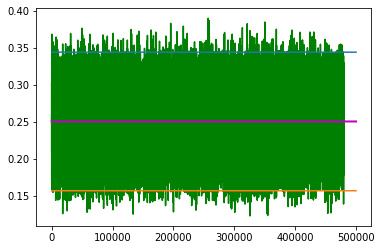

In [ ]:
plt.plot(a, 'g-', markersize = 3)
plt.plot(mean*np.ones(500000), 'm-', linewidth = 2)
plt.plot((mean+3*std)*np.ones(500000))
plt.plot((mean-3*std)*np.ones(500000))

In [ ]:
print('Shape of the Train dataset:', fault_free.shape)
print("Shape of the Test dataset:", faulty.shape)

Shape of the Train dataset: (480000, 56)
Shape of the Test dataset: (524354, 56)


In [ ]:
print("Distrubution of faults:")
print(faulty['faultNumber'].value_counts())

Distrubution of faults:
1     26880
2     26880
3     26880
4     26880
5     26880
6     26880
7     26114
19    25920
8     25920
9     25920
20    25920
11    25920
12    25920
13    25920
14    25920
15    25920
16    25920
17    25920
18    25920
10    25920
Name: faultNumber, dtype: int64


In [ ]:
faulty.columns

Index(['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11'],
      dtype='object')

In [ ]:
columns_names = faulty.columns

In [ ]:
faulty['faultNumber']

In [ ]:
faulty.iloc[1,2]

1.0

In [ ]:
faulty.iloc[:3,2]

0    1.0
1    1.0
2    1.0
Name: simulationRun, dtype: float64

In [ ]:
faulty.iloc[3:,2]

In [ ]:
faulty.iloc[3,:2]

Unnamed: 0     3.0
faultNumber    1.0
Name: 3, dtype: float64

In [ ]:
faulty.iloc[3,2:]

simulationRun       1.000000
sample              4.000000
xmeas_1             0.251530
xmeas_2          3628.300000
xmeas_3          4519.300000
xmeas_4             9.334700
xmeas_5            26.999000
xmeas_6            42.330000
xmeas_7          2703.900000
xmeas_8            74.861000
xmeas_9           120.380000
xmeas_10            0.336480
xmeas_11           79.957000
xmeas_12           50.668000
xmeas_13         2632.300000
xmeas_14           24.209000
xmeas_15           50.654000
xmeas_16         3101.300000
xmeas_17           23.378000
xmeas_18           65.692000
xmeas_19          230.420000
xmeas_20          341.380000
xmeas_21           94.466000
xmeas_22           77.147000
xmeas_23           32.492000
xmeas_24            8.986000
xmeas_25           25.882000
xmeas_26            6.988100
xmeas_27           18.750000
xmeas_28            1.620300
xmeas_29           33.387000
xmeas_30           13.666000
xmeas_31           23.703000
xmeas_32            1.223400
xmeas_33      

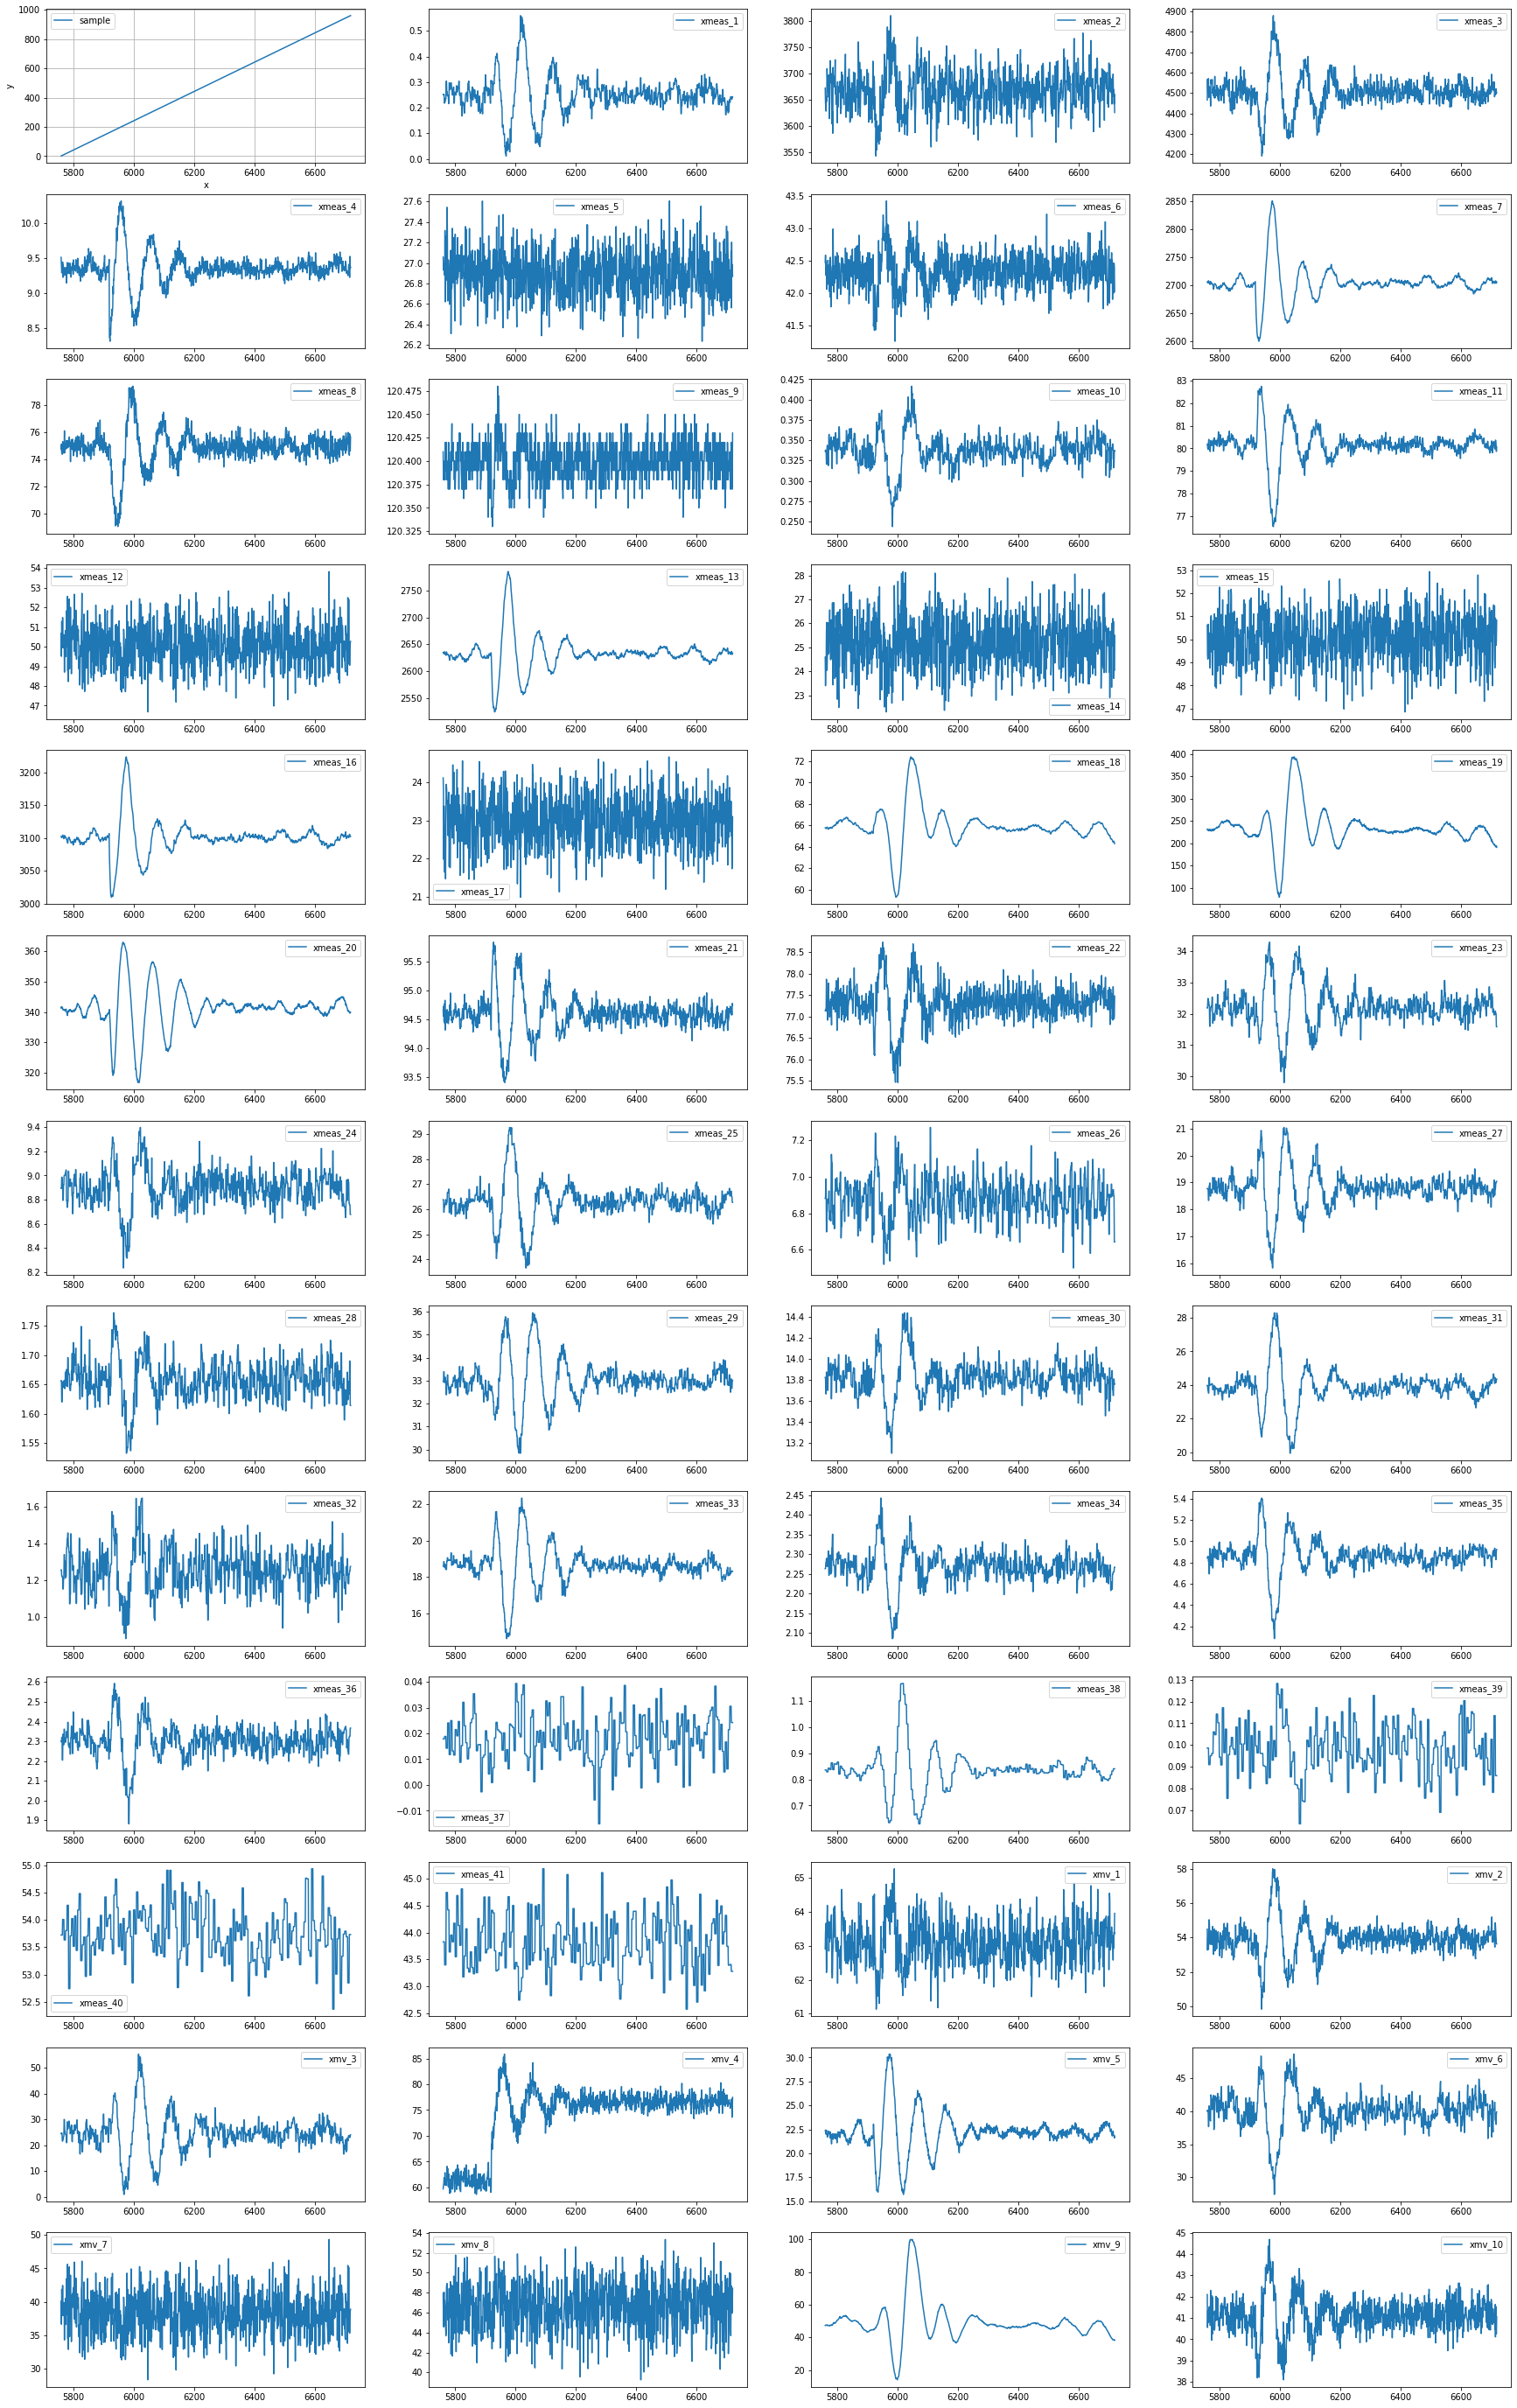

In [ ]:
run1 = faulty[(faulty.faultNumber==7) & (faulty.simulationRun==1)].iloc[:,3:]
fig, ax = plt.subplots(13,4,figsize=(30,50))

for i in range(run1.shape[1]-1):
    run1.iloc[:,i].plot(ax=ax.ravel()[i]) 
    ax.ravel()[i].legend();


plt.sca(ax[0,0])
plt.xticks(fontsize= 10)
plt.yticks(fontsize = 10)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.grid(True)

plt.sca(ax[0,1])

# leg = ax[0,1].legend( ncol=2,labels=['a','b','c'],fontsize=12,
# 		loc="lower right")
# leg.get_lines()[0].set_linewidth(2)
# leg.get_lines()[1].set_linewidth(2)
# leg.legendHandles[2]._legmarker.set_markersize(6)

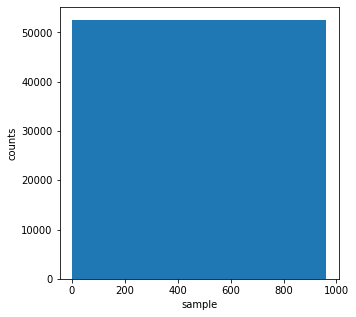

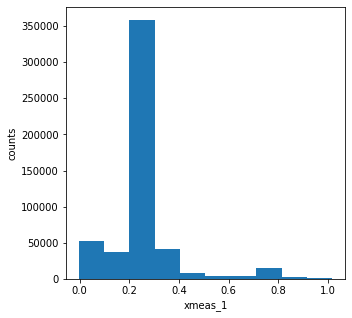

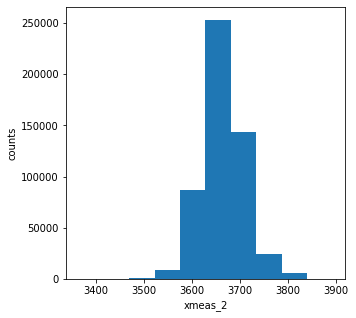

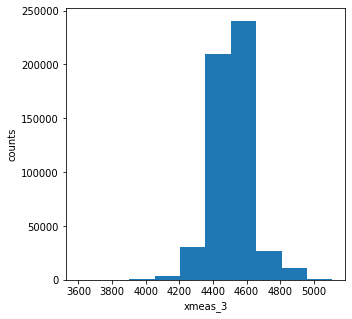

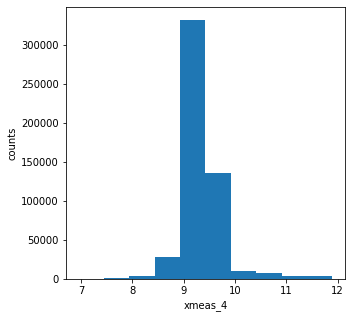

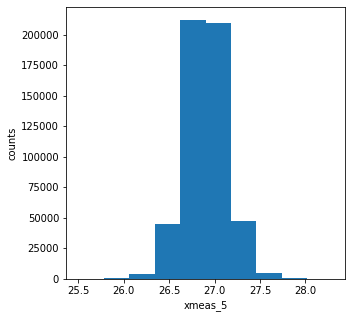

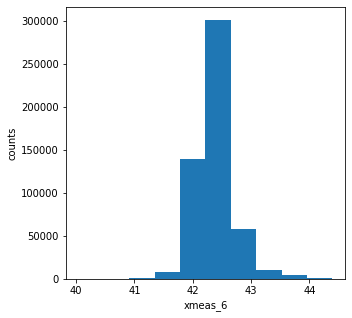

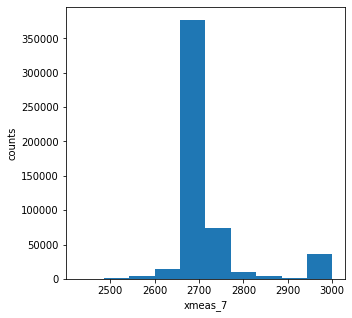

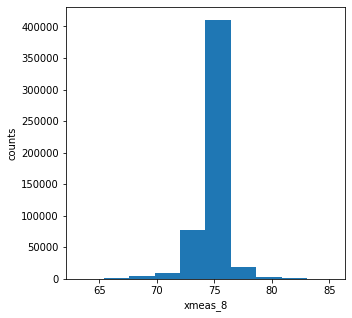

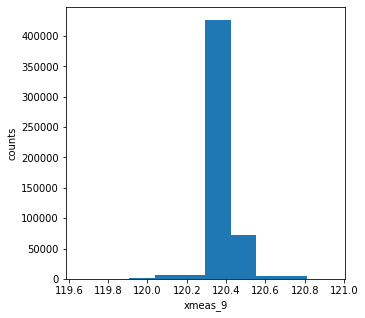

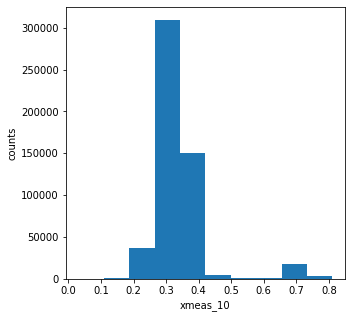

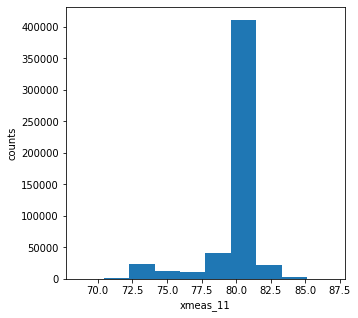

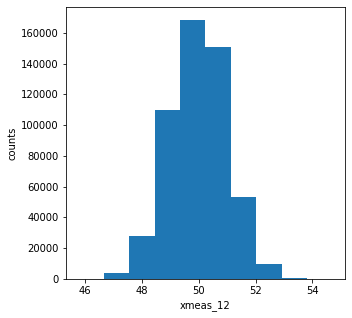

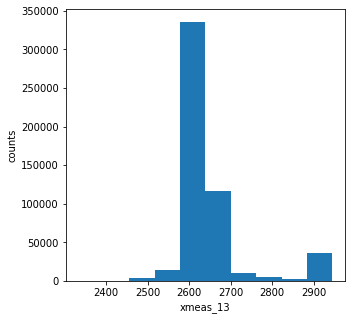

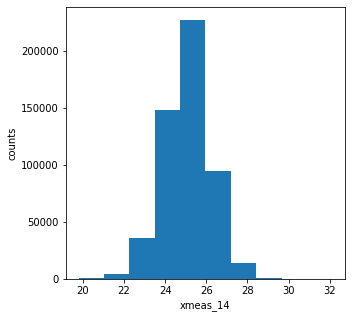

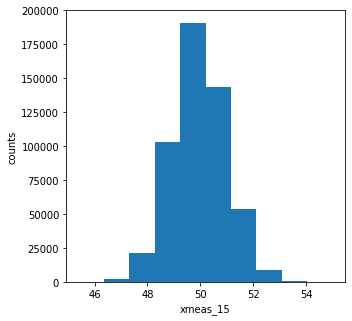

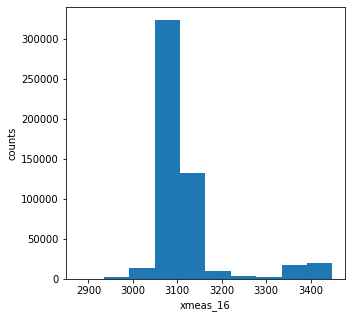

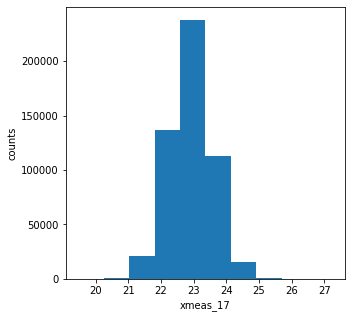

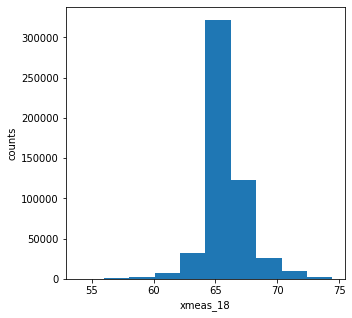

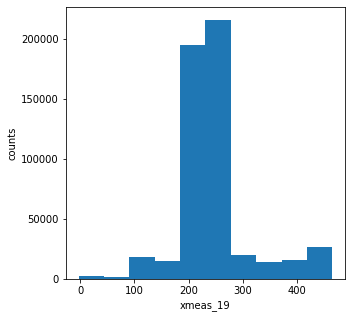

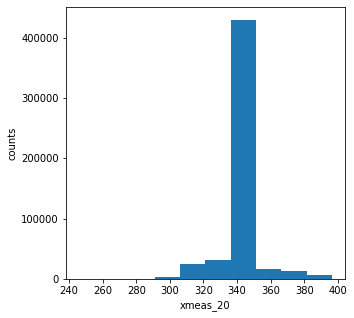

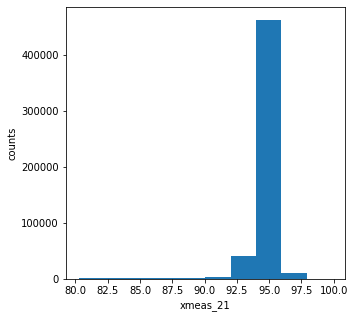

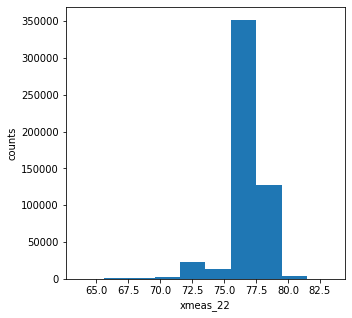

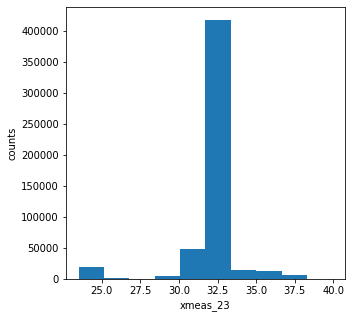

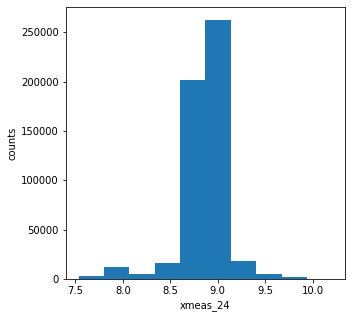

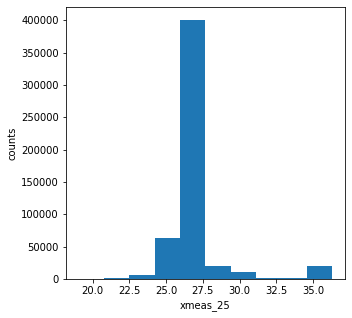

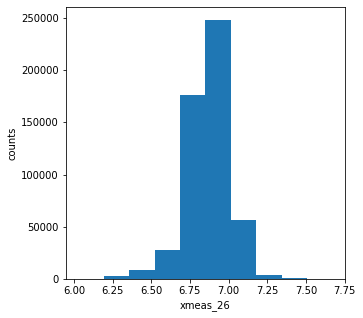

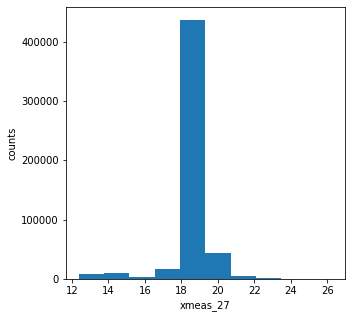

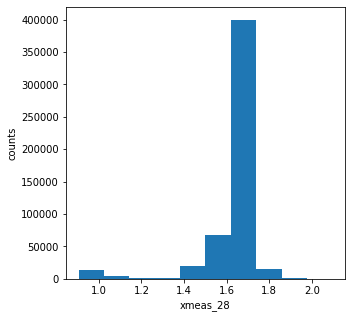

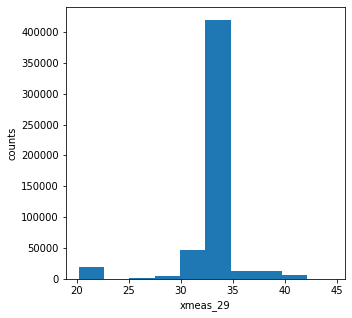

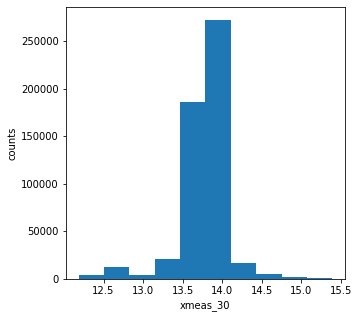

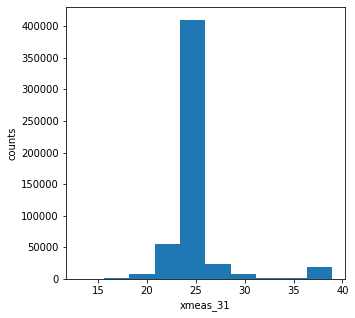

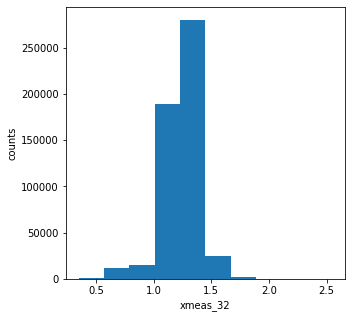

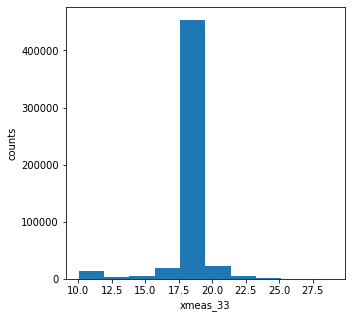

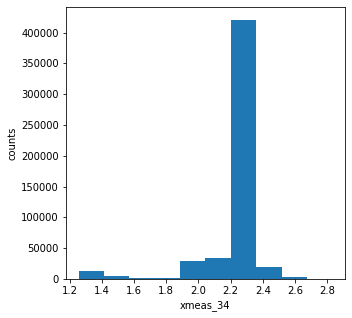

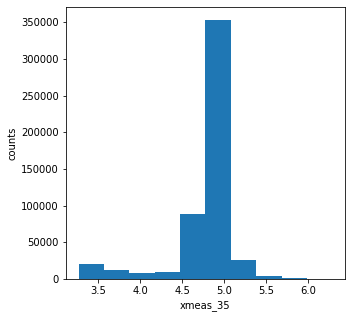

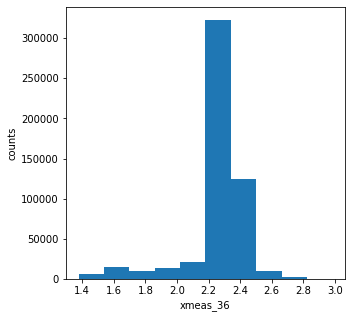

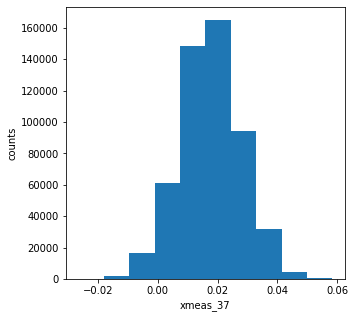

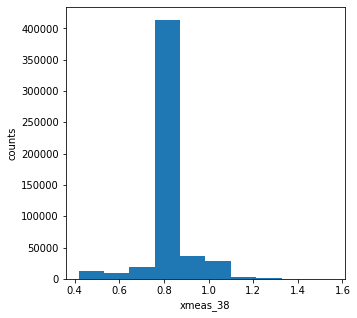

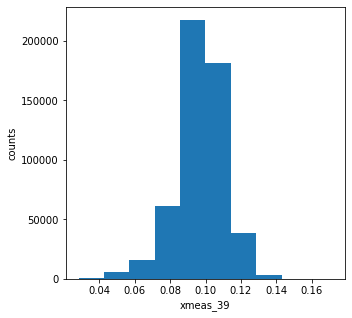

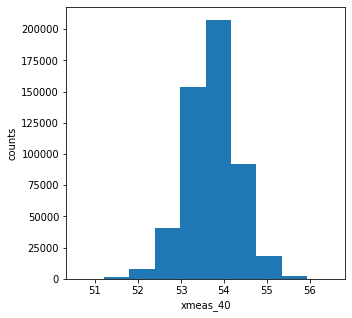

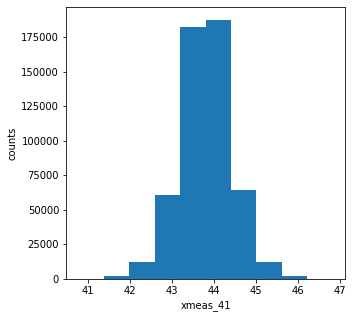

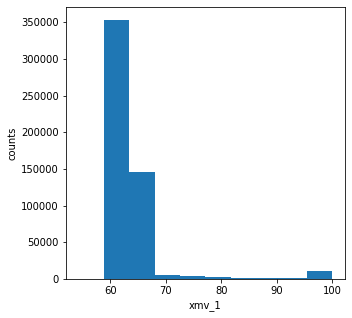

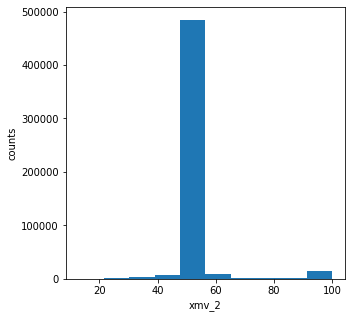

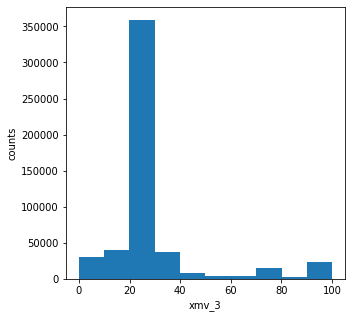

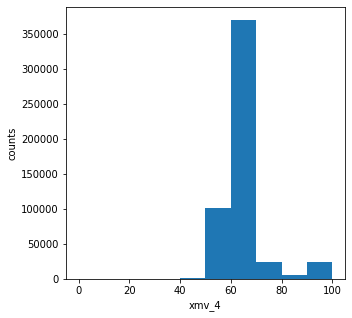

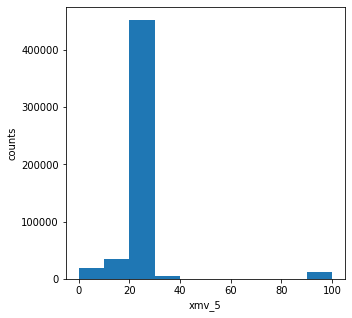

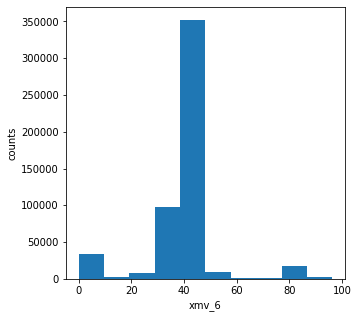

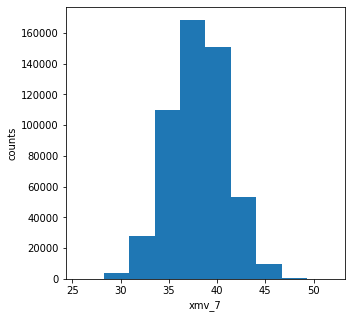

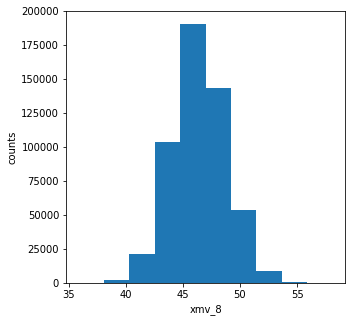

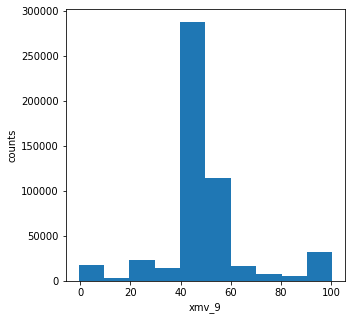

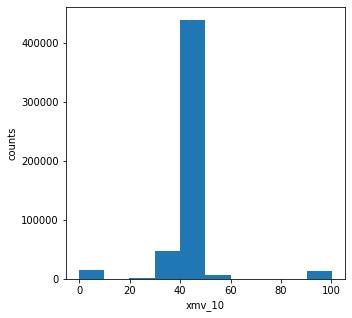

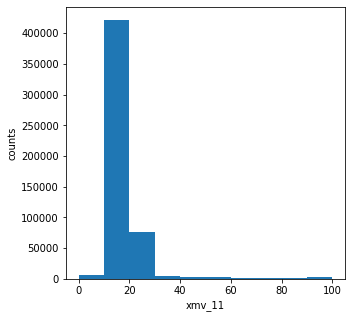

In [ ]:
#Program to plot the histogram of the features in the train dataset
for col in columns_names[3:]:
    plt.figure(figsize=(5,5))
    #plt.subplot(26,2,i)
    plt.hist(faulty[col])
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

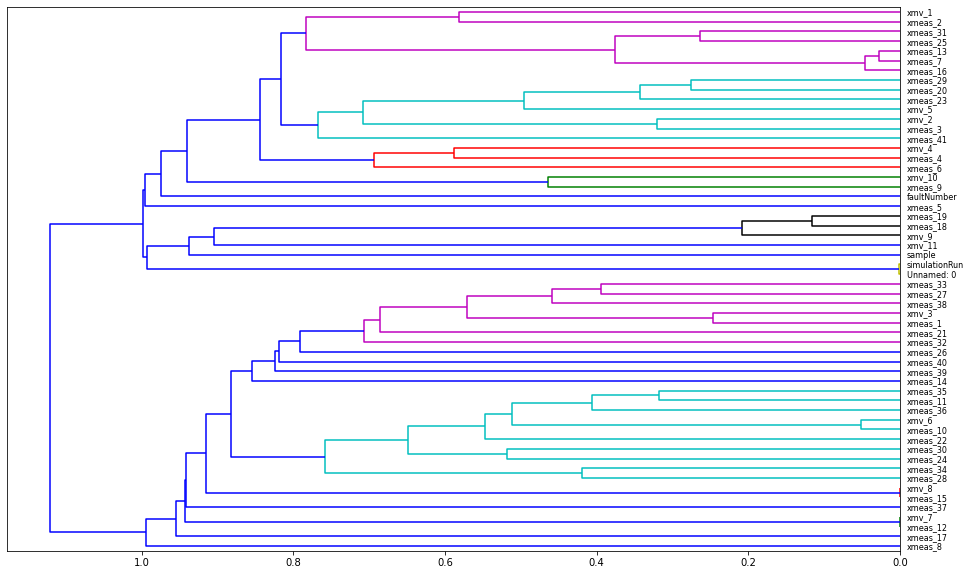

In [ ]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(faulty).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=faulty.columns, orientation='left', leaf_font_size=8)
plt.show()

In [ ]:
# Removing faults 3,9 and 15 
tr = faulty.drop(faulty[(faulty.faultNumber == 3) | (faulty.faultNumber == 9) | (faulty.faultNumber == 15)].index).reset_index()


In [ ]:
print("Distrubution of faults:")
print(tr['faultNumber'].value_counts())

Distrubution of faults:
1     26880
2     26880
4     26880
5     26880
6     26880
7     26114
10    25920
8     25920
20    25920
19    25920
12    25920
13    25920
14    25920
16    25920
17    25920
18    25920
11    25920
Name: faultNumber, dtype: int64


In [ ]:
#converting the class labels to categorical values and removing unnecessary features from data.
y= to_categorical(tr['faultNumber'],num_classes=21)
tr.drop(['faultNumber','Unnamed: 0','simulationRun','sample','index'],axis=1,inplace=True)


In [ ]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
tr

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,80.185,50.671,2634.6,24.592,50.614,3102.5,24.119,65.764,231.94,341.27,94.660,77.137,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,62.908,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,80.104,49.508,2634.1,23.399,49.353,3102.3,23.817,65.729,229.67,341.76,94.558,77.130,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,63.429,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,79.988,51.280,2632.1,24.319,49.144,3100.7,21.973,65.708,229.94,341.47,94.732,77.168,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.412,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,79.957,50.668,2632.3,24.209,50.654,3101.3,23.378,65.692,230.42,341.38,94.466,77.147,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.668,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,80.261,50.066,2636.1,25.682,49.198,3102.2,22.692,65.723,229.42,341.53,94.770,77.868,32.396,8.9172,26.103,6.6982,18.333,1.6463,32.913,13.874,23.524,1.2179,18.527,2.2895,4.8113,2.2049,0.017866,0.83570,0.098577,53.724,43.828,62.213,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445629,0.28439,3698.6,4300.8,9.9828,26.956,42.603,2682.9,69.942,120.43,0.36714,81.505,49.372,2613.0,25.840,50.213,3079.6,23.454,67.541,261.79,345.45,94.039,78.869,32.659,8.9432,25.031,6.6972,18.822,1.7394,33.600,13.852,21.535,1.3148,19.301,2.3443,5.2841,2.6488,0.022291,0.83814,0.083496,53.385,43.505,62.669,52.519,28.357,82.337,22.180,43.745,36.251,47.026,57.731,42.809,16.450
445630,0.26830,3686.6,4417.7,9.9305,26.813,42.586,2692.3,68.850,120.42,0.36535,81.506,50.715,2621.9,25.736,49.893,3089.2,21.922,67.536,262.84,347.36,93.758,78.908,32.979,8.7678,24.956,6.7596,19.105,1.7131,33.872,13.983,22.622,1.2187,19.226,2.3799,5.2711,2.4138,0.030387,0.80303,0.076345,54.027,43.691,63.225,52.117,26.465,82.514,22.468,42.301,40.205,46.286,57.425,42.730,20.042
445631,0.26971,3691.3,4425.8,10.1540,26.906,42.988,2700.2,69.702,120.44,0.36488,81.311,50.573,2630.8,26.216,49.078,3094.4,22.571,67.506,262.45,349.12,93.718,78.473,32.979,8.7678,24.956,6.7596,19.105,1.7131,33.872,13.983,22.622,1.2187,19.226,2.3799,5.2711,2.4138,0.030387,0.80303,0.076345,54.027,43.691,63.145,52.019,26.327,81.877,23.417,42.358,39.786,44.400,57.597,43.186,18.496
445632,0.22942,3675.7,4392.2,10.0330,27.271,43.368,2704.1,69.913,120.40,0.37911,80.838,49.215,2634.7,24.712,50.107,3097.5,24.170,67.420,263.17,350.90,93.822,78.510,33.058,8.7642,25.974,6.7033,18.492,1.7117,34.432,13.593,22.302,1.3077,18.174,2.3321,5.0509,2.3513,0.030387,0.80303,0.076345,54.027,43.691,63.010,51.695,22.909,82.777,23.651,44.261,35.788,46.782,5

Standard Scaling

In [ ]:
fault_free.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
ff = fault_free.iloc[:1000,:3]
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)

In [ ]:
pd.DataFrame(data=tr_s)

,0,1,2
0,0.044193,0.135991,-0.994948
1,0.063377,-0.773790,1.597757
2,-0.056595,-0.746678,0.048211
3,0.038712,-1.192531,0.346979
4,-0.993535,-0.364087,1.655991
...,...,...,...
995,0.029882,-0.499651,0.417874
996,-0.866864,0.033566,-0.460709
997,-0.953341,0.642095,-0.354367
998,-0.538920,-0.532789,0.524215


In [ ]:
# copy the data
df_max_scaled = tr.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
	
# view normalized data
display(df_max_scaled)


,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.247600,0.943649,0.874117,0.799546,0.956179,0.956750,0.901837,0.876699,0.995618,0.415016,0.922260,0.926310,0.894662,0.765438,0.920372,0.899536,0.885458,0.883462,0.498774,0.860684,0.947652,0.924239,0.806050,0.871294,0.726804,0.897262,0.714868,0.790523,0.739350,0.898006,0.615468,0.492861,0.641651,0.799103,0.770268,0.770231,0.306150,0.537704,0.574793,0.950497,0.936016,0.62908,0.54494,0.245049,0.596981,0.223391,0.417054,0.771604,0.825529,0.470553,0.419573,0.15345
1,0.248220,0.935889,0.894158,0.791334,0.954129,0.959295,0.901703,0.881109,0.995370,0.416977,0.921329,0.905049,0.894492,0.728306,0.897441,0.899478,0.874371,0.882991,0.493893,0.861920,0.946631,0.924155,0.806050,0.871294,0.726804,0.897262,0.714868,0.790523,0.739350,0.898006,0.615468,0.492861,0.641651,0.799103,0.770268,0.770231,0.306150,0.537704,0.574793,0.950497,0.936016,0.63429,0.53269,0.244430,0.604539,0.223951,0.415050,0.705695,0.775314,0.472563,0.404156,0.16063
2,0.244344,0.936120,0.882180,0.780878,0.951585,0.952357,0.901137,0.874236,0.995370,0.415756,0.919994,0.937443,0.893813,0.756941,0.893641,0.899014,0.806674,0.882709,0.494473,0.861189,0.948373,0.924611,0.813663,0.880376,0.713003,0.911095,0.713878,0.773155,0.748974,0.887806,0.608409,0.479878,0.650458,0.804364,0.772622,0.777435,0.306150,0.537704,0.574793,0.950497,0.936016,0.63412,0.54000,0.248376,0.606299,0.221813,0.416275,0.806146,0.766965,0.472334,0.412009,0.20452
3,0.247423,0.932317,0.884490,0.784626,0.954129,0.953529,0.901270,0.878001,0.995370,0.415090,0.919638,0.926255,0.893881,0.753517,0.921099,0.899188,0.858255,0.882494,0.495506,0.860962,0.945710,0.924359,0.813663,0.880376,0.713003,0.911095,0.713878,0.773155,0.748974,0.887806,0.608409,0.479878,0.650458,0.804364,0.772622,0.777435,0.306150,0.537704,0.574793,0.950497,0.936016,0.63668,0.53860,0.245309,0.618956,0.219634,0.416971,0.771449,0.827130,0.471946,0.406418,0.17123
4,0.214076,0.939384,0.894608,0.782441,0.950666,0.955151,0.902537,0.872360,0.995535,0.396166,0.923134,0.915250,0.895171,0.799365,0.894623,0.899449,0.833070,0.882911,0.493355,0.861340,0.948753,0.932998,0.811259,0.873636,0.719091,0.873299,0.698001,0.785561,0.738340,0.901319,0.603814,0.477720,0.639855,0.808354,0.765132,0.738833,0.306150,0.537704,0.574793,0.950497,0.936016,0.62213,0.53307,0.217554,0.618786,0.223941,0.391574,0.737350,0.769117,0.472841,0.409498,0.18681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445629,0.279746,0.950382,0.841726,0.839102,0.952610,0.959678,0.894270,0.820309,0.995783,0.452913,0.937442,0.902563,0.887327,0.804283,0.913080,0.892896,0.861045,0.907334,0.562965,0.871226,0.941435,0.944992,0.817845,0.876183,0.689559,0.873168,0.716619,0.829985,0.753752,0.899890,0.552761,0.515729,0.666586,0.827702,0.840320,0.887578,0.381976,0.539274,0.486857,0.944499,0.929118,0.62669,0.52519,0.283315,0.823205,0.221623,0.454409,0.697994,0.809537,0.574324,0.426639,0.16450
445630,0.263919,0.947298,0.864605,0.834706,0.947556,0.959295,0.897403,0.807501,0.995700,0.450704,0.937454,0.927114,0.890349,0.801046,0.907261,0.895680,0.804802,0.907266,0.565223,0.876043,0.938622,0.945459,0.825858,0.858999,0.687493,0.881304,0.727394,0.817436,0.759854,0.908400,0.580662,0.478034,0.663996,0.840271,0.838253,0.808833,0.520709,0.516684,0.445160,0.955858,0.933090,0.63225,0.52117,0.264412,0.824975,0.224500,0.439409,0.774126,0.796798,0.571279,0.425852,0.20042
445631,0.265306,0.948506,0.866190,0.853492,0.950843,0.968351,0.900037,0.817494,0

Plot Histogram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


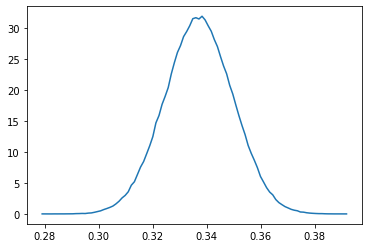

In [ ]:
hist, bins = np.histogram(fault_free['xmeas_10'], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


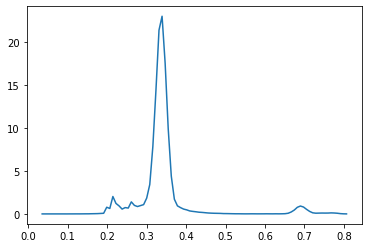

In [ ]:
hist, bins = np.histogram(faulty['xmeas_10'], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)